## Проект "Проверка гипотез по увеличению выручки в интернет-магазине, оценка результатов A/B теста"

**Заказчик:** отдел маркетинга крупного интернет-магазина.

**Входные данные:** список гипотез для увеличения выручки и данные, полученные в результате проведения А/В теста.

**Цель исследования:** отобрать и проверить рабочие гипотезы для увелчения выручки посредством приоритизации гипотез, проанализировать результаты A/B-теста.

# Часть 1. Приоритизация гипотез.

##  Загрузка данных для приоритезации гипотез

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
hypothes= pd.read_csv('/datasets/hypothesis.csv')

pd.options.display.max_colwidth = 400

display(hypothes)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


### Методы преоритезации гипотез ICE и  RICE

Метод ICE (от англ. impact, confidence, effort / ease «влияние, уверенность, усилия / простота»), расчитывается двумя способами:

1)  ICE = Impact * Confidence * Ease
2)  ICE = Impact * Confidence/Efforts

Метод RICE расчитывается как: 

RICE = Reach * Impact * Confidence/Efforts, где параметры

* Reach — скольких пользователей затронет изменение, которое вы хотите внести;
* Impact — насколько сильно изменение повлияет на пользователей, их опыт и удовлетворение от продукта;
* Confidence — насколько вы уверены, что это изменение повлияет на пользователей именно так;
* Efforts — сколько стоит протестировать эту гипотезу.

В загруженной выше таблице с данными видим оценки каждой гипотезы по перечисленным параметрам.

### Приоритезация гипотез. Фреймворк ICE.

In [3]:
hypothes['ICE']=round((hypothes['Impact']*hypothes['Confidence'])/hypothes['Efforts'], 2)

#print(hypothes[['Hypothesis','ICE']].sort_values(by='ICE', ascending=False))

display(hypothes[['Hypothesis','ICE']].sort_values(by='ICE', ascending=False))

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


Наиболее перспективные гипотезы, оценённые методом ICE: 9, 1 и 8.

### Приоритезация гипотез. Фреймворк RICE.

In [4]:
hypothes['RICE'] = (hypothes['Reach']*hypothes['Impact']*hypothes['Confidence'])/hypothes['Efforts']

display(hypothes[['Hypothesis','RICE']].sort_values(by='RICE', ascending=False))

,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Наиболее перспективные гипотезы, оценённые методом RICE: 8, 3, 1 и 7, ну и с натяжкой можно добавить 9 гипотезу.

### Различия в приоритезации гипотез фреймворками ICE и RICE.

Определения параметров: 

**Reach** — скольких пользователей затронет изменение, которое вы хотите внести;

**Impact** — насколько сильно изменение повлияет на пользователей, их опыт и удовлетворение от продукта;

**Confidence** — насколько вы уверены, что это изменение повлияет на пользователей именно так;

**Efforts** — сколько стоит протестировать эту гипотезу.

При оценке гипотез методами ICE и RICE, получились следующие результаты:
ICE: 9, 1, 8
RICE: 8, 3, 1, 7

При обоих методах высокий приоритет получили гипотезы №1 и №8 имеют высокие оценки по параметрам: Impact, Confidence, Reach.

Причины различий:
гипотеза №9 имеет высокие оценки по параметрам Impact и Confidence, но самый низкий из всех гипотез параметр Reach=1, что опустило гипотезу №9 с первого места при оценке методом ICE на 5-место по приоритету при оценке методом RICE.

Гипотезы №3 и №7, которые не попали в ТОР-3 по методу ICE, из-за низкой оценки по параметру Impact=3, но благодаря высоким оценкам по параметру Reach - у гипотезы №3 Reach = 8, №7 Reach= 5, эти гипотезы попали в ТОР-4 при оценке методом RICE.

# Часть 2. Анализ A/B-теста

## Загрузка данных для анализа результатов A/B-теста

In [5]:
orders= pd.read_csv('/datasets/orders.csv')
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
orders.head(5)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [6]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [7]:
visitors= pd.read_csv('/datasets/visitors.csv')
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x,'%Y-%m-%d'))
visitors.head(5)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [8]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


## Предобработка данных

In [9]:
# проверим наличие дубликатов в таблице orders
orders.duplicated().sum()

0

In [10]:
# проверим наличие дубликатов в таблице visitors
visitors.duplicated().sum()

0

In [11]:
#Проверим таблицы на наличие пропусков в столбцах полученных таблиц:

print('Количество пропусков в столбцах таблицы orders:')
print()
for col in orders:
    a = len(orders[orders[col].isna()]) #находим кол-во пропусков в каждом слолбце
    print('{}'.format(col), a)

Количество пропусков в столбцах таблицы orders:

transactionId 0
visitorId 0
date 0
revenue 0
group 0


In [12]:
print('Количество пропусков в столбцах таблицы visitors:')
print()
for col in visitors:
    a = len(visitors[visitors[col].isna()]) #находим кол-во пропусков в каждом слолбце
    print('{}'.format(col), a)

Количество пропусков в столбцах таблицы visitors:

date 0
group 0
visitors 0


In [14]:
#проверим полученный результат замены типа данных 
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [15]:
#проверим полученный результат замены типа данных 
visitors.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


Проверим, есть ли пользователи попавшие в обе группы, для этого создадим массив уникальных пар значений пользователей и групп теста:

In [16]:
visitor_group =  orders[['visitorId', 'group']].drop_duplicates()

Теперь полученный массив проверим на дубликаты идентификторов пользователей: 

In [17]:
visitor_group['visitorId'].duplicated().sum()

58

In [18]:
#посчитаем количество уникальных пользователей 
visitor_group['visitorId'].nunique()

1031

In [19]:
#найдём, какой % дубликатов, а значит пересечений пользователей в группах А и В:
dup= visitor_group['visitorId'].duplicated().sum()/visitor_group['visitorId'].nunique()*100
display('% пересечений пользователей в группах А и В:', round(dup,1))

'% пересечений пользователей в группах А и В:'

5.6

Для дальнейшей оценки результатов теста, удалим данные о пользователях, которые попали в обе группы. Для этого получим список пользователей, которые входят в обе группы:

In [20]:
un_visitors = orders.groupby('visitorId', as_index=False)['group'].agg({'group' : 'nunique'})
user_2_group = un_visitors[un_visitors['group']==2].reset_index()
user_2_group.head()

,index,visitorId,group
0,2,8300375,2
1,44,199603092,2
2,51,232979603,2
3,55,237748145,2
4,66,276558944,2


In [21]:
# сделаем проверку, проверка подтверждает, что это те самые дубликаты 
len(user_2_group)

58

In [22]:
user_1_group = un_visitors[un_visitors['group']==1].reset_index()
user_1_group.head()

,index,visitorId,group
0,0,5114589,1
1,1,6958315,1
2,3,11685486,1
3,4,39475350,1
4,5,47206413,1


In [23]:
user_1_group = user_1_group.drop(columns = ['index','group'])
user_1_group.head(3)

,visitorId
0,5114589
1,6958315
2,11685486


Теперь очистим таблицу orders от записей о пользователях, которые попали в обе группы:

 1-й способ: не работает: 

In [24]:
#cl_orders=orders[np.logical_not(orders['visitorId'].isin(user_2_group))]     
#cl_orders.head(3)

In [25]:
#un_visitors_1 = cl_orders.groupby('visitorId', as_index=False)['group'].agg({'group' : 'nunique'})
#user_2_group_1 = un_visitors_1[un_visitors_1['group']==2].reset_index()
#user_2_group_1.head(3)

2-й способ:работает:

In [26]:
orders = orders.merge(user_1_group, how='right', on=['visitorId'])
orders.head(3)

,transactionId,visitorId,date,revenue,group
0,900025958,5114589,2019-08-16,570,B
1,1887336629,6958315,2019-08-04,1490,B
2,797272237,11685486,2019-08-23,6201,A


Сделаем проверку, что теперь таблица не содержит данных о пользователях, которые попали в обе группы:

In [27]:
un_visitors = orders.groupby('visitorId', as_index=False)['group'].agg({'group' : 'nunique'})
user_2_group = un_visitors[un_visitors['group']==2].reset_index()
user_2_group.head(3)

,index,visitorId,group


## График кумулятивной выручки по группам

Чтобы построить график, соберём кумулятивные данные. Для этого создадим таблицу СumulativeData со следующими столбцами:
* date — дата;
* group — группа A/B-теста (A или B);
* orders — кумулятивное количество заказов на указанную дату в указанной группе;
* buyers — кумулятивное количество пользователей, совершивших хотя бы один заказ, на указанную дату в указанной группе;
* revenue — кумулятивная выручка на указанную дату в указанной группе (средний чек);
* visitors — кумулятивное количество посетителей интернет-магазина на указанную дату в определённой группе.

Сначала создадим массив уникальных пар значений дат и групп теста:

In [28]:
datesGroups = orders[['date', 'group']].drop_duplicates()

Соберём агрегированные кумулятивные по дням данные о заказах:


Шаг1. Получим строки таблицы orders, дата которых меньше или равна дате элемента из datesGroups и группа теста равна группе из datesGroups:

In [29]:
orders[np.logical_and(orders['date'] <= orders['date'], orders['group'] == orders['group'])]

,transactionId,visitorId,date,revenue,group
0,900025958,5114589,2019-08-16,570,B
1,1887336629,6958315,2019-08-04,1490,B
2,797272237,11685486,2019-08-23,6201,A
3,437876380,39475350,2019-08-08,3990,B
4,3778001764,47206413,2019-08-10,730,B
...,...,...,...,...,...
1011,1266191879,4259830713,2019-08-11,3190,A
1012,51443164,4278982564,2019-08-05,24744,A
1013,2724331495,4279090005,2019-08-04,6716,B
1014,3796325351,4281247801,2019-08-25,2640,B


In [30]:
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

ordersAggregated.head(5)

,date,group,transactionId,visitorId,revenue
90,2019-08-01,A,23,19,142779
23,2019-08-01,B,17,17,59758
38,2019-08-02,A,42,36,234381
121,2019-08-02,B,40,39,221801
21,2019-08-03,A,66,60,346854


Получим агрегированные кумулятивные по дням данные о посетителях интернет-магазина:

In [31]:
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])
visitorsAggregated

,date,group,visitors
90,2019-08-01,A,719
23,2019-08-01,B,713
38,2019-08-02,A,1338
121,2019-08-02,B,1294
21,2019-08-03,A,1845
...,...,...,...
20,2019-08-29,B,17708
152,2019-08-30,A,18037
45,2019-08-30,B,18198
129,2019-08-31,A,18736


Объединим таблицы ordersAggregated и visitorsAggregated и переименуем столбцы:

In [32]:
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulativeData.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


Теперь можем построить графики кумулятивной выручки по дням и группам A/B-тестирования:

Выделим из полученной таблицы датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А:

In [33]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueA.head(3)

,date,revenue,orders
0,2019-08-01,142779,23
2,2019-08-02,234381,42
4,2019-08-03,346854,66


Аналогично выделим датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B:

In [34]:
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]
cumulativeRevenueB.head(3)

,date,revenue,orders
1,2019-08-01,59758,17
3,2019-08-02,221801,40
5,2019-08-03,288850,54


График выручки групп А и В:

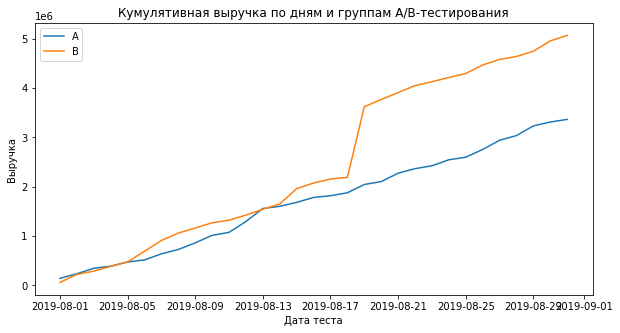

In [35]:
plt.figure(figsize=(10, 5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.xlabel('Дата теста')
plt.ylabel('Выручка')
plt.title('Кумулятивная выручка по дням и группам A/B-тестирования')
plt.legend() 

plt.show()

**Выводы к графику:** видим, что на протяжении всего теста кумулятивная выручка растёт, причём группа B в первой половине периода теста шла почти в ровень с группой А, а после 17 августа опережает группу А. 17 августа группе В выручка резко растет, что может говорить о резком увеличении числа заказов, либо об очень дорогих заказов в выборке.

## График кумулятивного среднего чека по группам

Для построения графиков среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов:

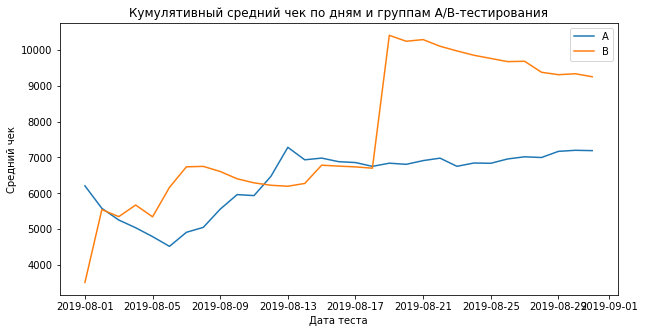

In [36]:
plt.figure(figsize=(10, 5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

plt.xlabel('Дата теста')
plt.ylabel('Средний чек')
plt.title('Кумулятивный средний чек по дням и группам A/B-тестирования')
plt.legend() 

plt.show()

**Выводы к графику:** видим, что для группы А были резкие всплески и падения по величине среднего чек и только с 14 авугуста стал устанавливаться на его реальном уровне. На графике группы В с 18 по 20 августа очень резкий всплеск по размеру среднего чека, который соответсвует всплеску на предыдущем графике выручки, что может поддтверждать предположение о крупных заказах в этот период в группе. После этого всплеска средний чек стал стабильно снижаться, приходя к своему среднему значению. Но, возможно за выбранный период, ещё не пришёл к своему реальному среднему значению.
 

## График относительного изменения кумулятивного среднего чека группы B к группе А

Сначала соберём данные кумулятивной выручки по каждой группе в одну таблицу:

In [37]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

Теперь, построим график отношения средних чеков

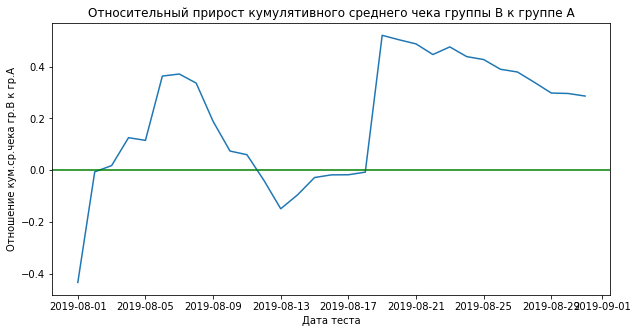

In [38]:
plt.figure(figsize=(10, 5))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

plt.axhline(y=0, color='Green', linestyle='-') # добавляем ось X
plt.xlabel('Дата теста')
plt.ylabel('Отношение кум.ср.чека гр.В к гр.А')
plt.title('Относительный прирост кумулятивного среднего чека группы B к группе А')

plt.show()

**Выводы к графику:** резкие скачки на графике говорят нам о крупных заказах и выбросах в группе В.

## График кумулятивной конверсии по группам

Для построения графика сделаем рассчёт кумулятивной конверси:

In [39]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

И выделим из таблицы cumulativeData данные по кумулятивной конверсии по каждой группе:

In [40]:
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

И теперь строим графики:

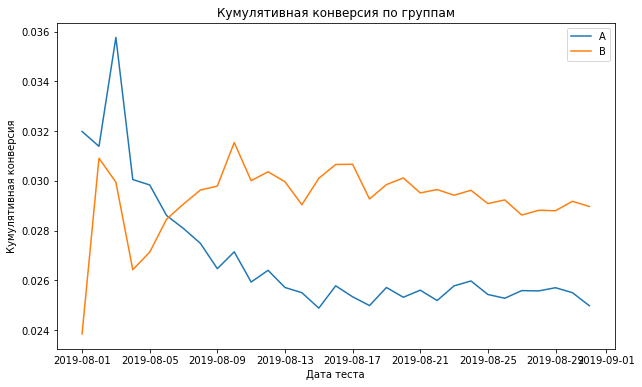

In [41]:
plt.figure(figsize=(10, 6))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')

plt.legend()

plt.xlabel('Дата теста')
plt.ylabel('Кумулятивная конверсия')
plt.title('Кумулятивная конверсия по группам')

plt.show()

**Выводы к графику**: по графику видим, что после колебаний (с начала теста до 6 августа) графики стали практически симментричными, при том, что конверсия группы В после проседания пошла в рост и колебалась на уровне 3,5% (с некоторыми выбрасами 9 и 17 августа), а конверсия группы А после резкого роста сильно провалилась и колебалась на уровне 3%

## График относительного изменения кумулятивной конверсии группы B к группе А

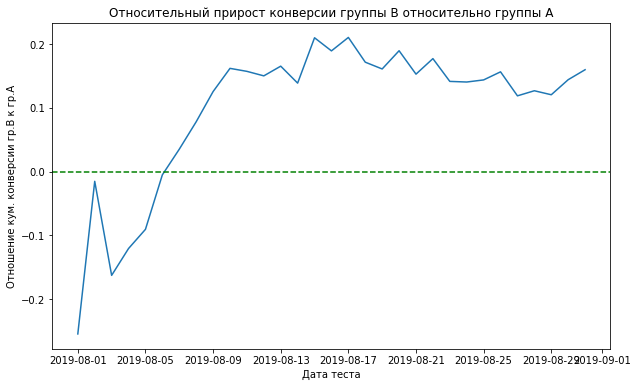

In [42]:
plt.figure(figsize=(10, 6))
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])


plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)
plt.axhline(y=0, color='green', linestyle='--')


plt.xlabel('Дата теста')
plt.ylabel('Отношение кум. конверсии гр.В к гр.А')
plt.title('Относительный прирост конверсии группы B относительно группы A')

plt.show()

**Вывод к графику**: в начале теста были колебания - группа В то выигрывала, то проигрывала группе А по кумулятивной конверсии, но после 6 августа группа В резко вырвалась вперёд и уже не проигрывала группе А, хотя 17-18 августа преимущество группы В по кумулятивной конверсии перед группой А ступенчато снижалось и только с 29 августа опять начало рост, что говорит о том, что отношение конверсии ещё не установилось, и делать выводы по тесту преждевременно.

## График количества заказов по пользователям

Пользователи, совершившие много заказов, влияют на числитель формулы конверсии.Поэтому подсчитаем количество заказов по пользователям и посмотрим на результат:

In [43]:
ordersByUsers = (orders.groupby('visitorId', as_index=False).agg({'transactionId': 'nunique'}))

ordersByUsers.columns = ['visitorId', 'orders']

ordersByUsers.sort_values(by='orders', ascending=False).head(15)

,visitorId,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3
138,611059232,3
632,2742574263,3
157,678354126,2
323,1404560065,2
452,1985475298,2


Из расчетов видим, что есть пользователи, у которых есть 3, 2 и 1 заказы.

Теперь построим точечную диаграмму числа заказов на одного пользователя, чтобы увидеть общую картину:

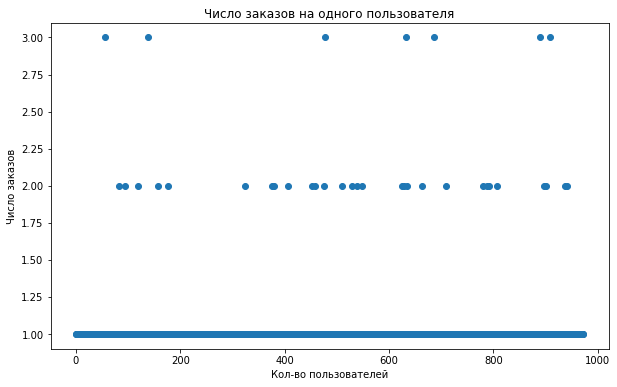

In [44]:
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.figure(figsize=(10, 6))

plt.scatter(x_values, ordersByUsers['orders']) 

plt.xlabel('Кол-во пользователей') 
plt.ylabel('Число заказов')
plt.title('Число заказов на одного пользователя')

plt.show()

**Вывод к графику:** из графика видим, что основная часть пользователей сделали по 1 заказу, при этом достаточно много пользователей, кто сделал 2-3 заказа. Но из графика мы не можем понять, какую точную долю занимают такие пользователи, чтобы понять является это аномалией или нет.

##  95-й и 99-й перцентили количества заказов на пользователя

Посчитаем 95 и 99 перцентили количества заказов на одного пользователя:

In [45]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([1., 2.])

**Выводы к расчтёту:**
результат расчётов говорит нам о том, что не более 5% пользователей сделали более 1-го заказа и не более 1% пользователей сделали более 2-х заказов. В связи с этим будем считать 1 заказ на одного пользователя за верхней границей числа заказов. Пользователей с большим кол-вом заказов отнесём к аномальным.


## График стоимостей заказов

Построим точечный график стоимостей заказов:

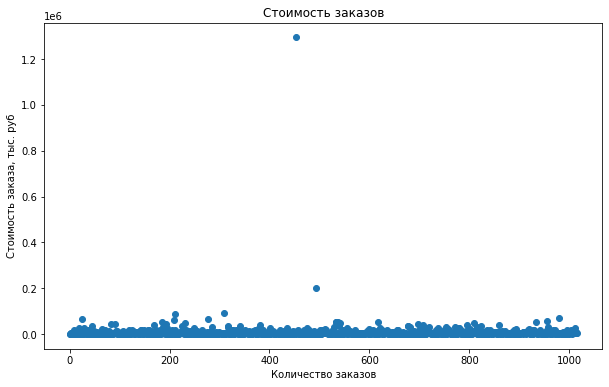

In [46]:
plt.figure(figsize=(10, 6))
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']) 


plt.xlabel('Количество заказов') 
plt.ylabel('Стоимость заказа, тыс. руб')
plt.title('Стоимость заказов')

plt.show()

**Выводы к графику:** из графика видим, что подавляющая часть заказов по стоимости находится в зоне 50-100 тыс. руб и очень малая часть заказов выбивается за эту границу. 

## 95-й и 99-й перцентили стоимости заказов

Посчитаем 95-й и 99-й перцентили стоимости заказов:

In [47]:
np.percentile(orders['revenue'], [95, 99])

array([26785., 53904.])

Из рассчета видим, что не более 5% заказов превышают сумму в 26 785 руб. и не более 1% превышают сумму заказа в 53 904 руб. Из чего можем определить, что  26 785 руб. является верхней границей стоимости заказов. Заказы с большей стоимостью отнесём к аномальным.

## Cтатистическая значимость различий в конверсии между группами по «сырым» данным. 

Сформулируем гипотезы:

Н0: распределение значений дневной конверсии в группе А за календарный месяц РАВНО распределению значений дневной конверсии в группе В за календарный месяц;

Н1: распределение значений дневной конверсии в группе А за календарный месяц НЕ РАВНО  распределению значений дневной конверсии в группе В за календарный месяц

Подготовим данные:

In [48]:
# найдём количество пользователей в выбранную дату в группе A:

visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA'] #visitorsPerDateA — количество пользователей в выбранную дату в группе A;

# найдём кумулятивное количество пользователей в группе А до выбранной даты включительно:
visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA'] #visitorsCummulativeA — количество пользователей до выбранной даты включительно в группе A;

# аналогично найдём количество пользователей в выбранную дату в группе В:
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

# аналогично найдём кумулятивное количество пользователей в группе В до выбранной даты включительно:
visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

# найдём количество заказов и суммарную выручку в выбранную дату в группе А:
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'visitorId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

# найдём куммулятивное количество заказов и кумулятивную выручку до выбранной даты включительно в группе A;
ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

# найдём количество заказов и суммарную выручку в выбранную дату в группе В:
ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

# найдём куммулятивное количество заказов и кумулятивную выручку до выбранной даты включительно в группе A;
ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

In [49]:
data.head(3)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,19,142779,17,59758,19,142779,17,59758,719,713,719,713
1,2019-08-02,18,91602,23,162043,37,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,61,346854,54,288850,507,509,1845,1803


Для расчёта статистической значимости различия в конверсии между группами создадим переменные ordersByUsersA и ordersByUsersB. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.

In [50]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders'] 

Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни

In [51]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0) 

In [52]:
print('p-value=',"{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

p-value= 0.011
0.160


**Вывод к расчётам:** 0,011 меньше 0,05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, отвергаем. Относительный проигрыш группы А равен 16%.

## Cтатистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным — без удаления аномальных пользователей.

In [53]:
data.head(3)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,19,142779,17,59758,19,142779,17,59758,719,713,719,713
1,2019-08-02,18,91602,23,162043,37,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,61,346854,54,288850,507,509,1845,1803


**Сформулируем гипотезы:**

* H0 - Нет различий в среднем чеке между группами А и В

* H1 - Есть различия в среднем чеке между группами А и В


Для расчёта статистической значимости различий в среднем чеке, передадим критерию mannwhitneyu() данные о выручке с заказов, а также найдём относительные различия в среднем чеке между группами:


In [54]:
print('p-value=','{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

p-value= 0.829
0.287


**Выводы к расчётам:**

p-value = 0,829 больше 0.05, значит нулевую гипотезу о том статистически значимых различий в среднем числе заказов между группами нет, не отвергаем. 

Второе число 0,287 - говорит о том, средний чек группы B выше среднего чека группы А на 28,7%.
    

## "Аномальные" пользователи

Примем за аномальных пользователей тех, кто совершил более 1-го заказа или совершил заказ дороже 26 785 рублей.

In [55]:
# сделаем срезы пользователей по обоим групам с числом заказов больше 2-х
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 1]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > 1]['visitorId'],
    ],
    axis=0,
)

# сделаем срезы пользователей по обоим групам, совершивших заказы дороже 28 000 руб.
usersWithExpensiveOrders = orders[orders['revenue'] > 26785]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
#print(abnormalUsers.head(5))

# узнаем, сколько всего аномальных пользователей атрибутом shape
abnormalUsers.shape[0]

86

**Выводы к расчётам:**
таким образом, имеем 86 "аномальных пользователей", у которых более 1-го заказа или заказ стоил дороже 26 785 рублей.

## Cтатистическая значимость различий в конверсии между группами по «очищенным» данным

Проверим гипотезы:

**Сформулируем гипотезы:**

* H0 - Нет различий в конверсии между группами А и В по очищенным данным

* H1 - Есть различия в конверсии между группами А и В по очищенным данным.

Для расчёта статистической значимости различий в конверсии между группами теста по очищенным данным,подготовим выборки количества заказов по пользователям по группам теста:

In [56]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

Применим статистический критерий Манна-Уитни к полученным выборкам:

In [57]:
print('p-value=','{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

p-value= 0.016
0.174


**Вывод к расчётам**: 0,016 меньше 0,05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, и по очищенным данным отвергаем. Относительный проигрыш группы А равен 17,4 %.

##  Cтатистическая значимость различий в среднем чеке заказа между группами по «очищенным»  данным

Проверим, как повлияет удаление "аномальных" пользователей на результаты теста:

In [58]:
print('p-value='
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print("Отношение ср.чека в гр. В к гр. А:"
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

p-value=0.727
Отношение ср.чека в гр. В к гр. А:-0.034


**Выводы к расчётам:**
по очищенным данным p-value = 0.727 - больше 0.05, значит нулевую гипотезу о том статистически значимых различий в среднем числе заказов между группами нет, не отвергаем.

При этом проигрыш группы А относительно группы В сократился с 28,7% до 3,4%, что говорит о сильном влиянии аномалий на результаты А/В теста.

## Выводы к тесту 

В результате исследования получены следующие результаты:

**Конверсия**: 
по "сырым" данным конверсия группы В конверсии группы А на 16%, по "очищенным" выше на 17,4%, что в обоих случаях являестя статистически значимой разницой в конверсии групп А и В.

**Средний чек заказа:**
по "сырым" данным средний чек группы В выше, чем в группе А на 28,7%, что но различие не является статистически значимым между группами А и В.

по "очищенным" данным средний чек группы В выше, чем в группе А только на 3,4%, что также не является статистически значимым различием.

График различия конверсии говорит о том, что результаты группы В выше результатов группы А и нет предпосылок для улучшения по конверсии у группы А.

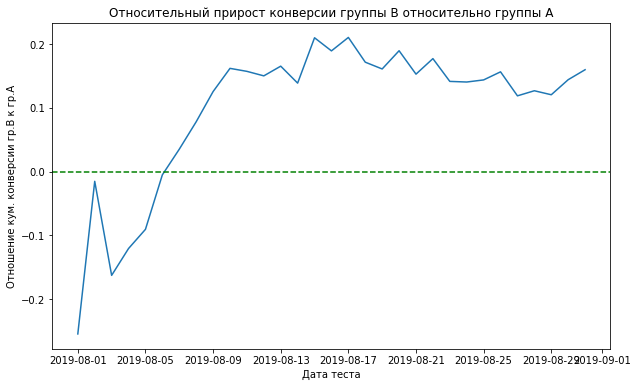

In [59]:
plt.figure(figsize=(10, 6))
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])


plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)
plt.axhline(y=0, color='green', linestyle='--')


plt.xlabel('Дата теста')
plt.ylabel('Отношение кум. конверсии гр.В к гр.А')
plt.title('Относительный прирост конверсии группы B относительно группы A')

plt.show()

График различия среднего чека говорит о том, что результаты группы B ещё не пришли к своему среднему значению и после резкого скачка, вызванного аномальными по сотоимости заказами только стали "выравниваться".

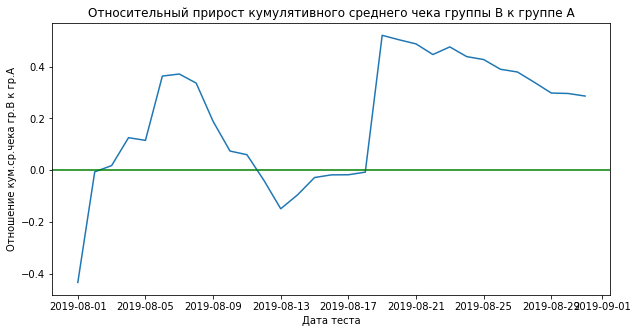

In [60]:
plt.figure(figsize=(10, 5))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

plt.axhline(y=0, color='Green', linestyle='-') # добавляем ось X
plt.xlabel('Дата теста')
plt.ylabel('Отношение кум.ср.чека гр.В к гр.А')
plt.title('Относительный прирост кумулятивного среднего чека группы B к группе А')

plt.show()

**Для принятия решения по результатам теста имеем следующие факты:**

1) по величине среднего чека между группами статистически значимых различий нет, хотя процентном отношении средний чек группы В выше; 

2) конверсия между группами различается в пользу группы В, что в итоге даст больше прибыли, чем от группы А даже при отсутсвующей стат. значимой разнице в среднем чеке.

Поэтому тест можем остановить, признав выигрыш группы В.